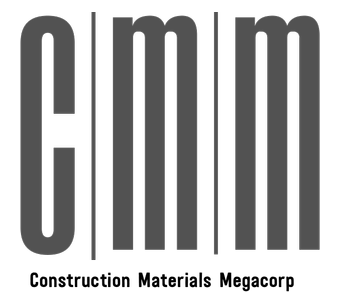

# Trabajo Práctico Grupal Obligatorio - Parte 2
## Codo a Codo - Big Data - Comisión 24011 - Grupo 031
---



##1 - Importación de librerías y obtención de Datos

---

En esta primera instancia, se importan las librerías necesarias para el tratamiento, modelado y visualización de datos.

###1.1 - Importación de Librerías

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

###1.2 - Obtención de datos

In [ ]:
# Mediante el ID de planilla y el nombre de cada hoja, generamos una URL correspondiente a cada planilla y la importamos como CSV.
ID_planilla = '1F4JuwGKbiHjrXkghoyl7SGFScbtmqOQDzAaq-jPc3qI'
URL = f'https://docs.google.com/spreadsheets/d/{ID_planilla}/gviz/tq?tqx=out:csv&sheet='

In [ ]:
df_sales_original = pd.read_csv(URL + 'sales_in_Paraguay')

In [ ]:
df_distributors_original = pd.read_csv(URL + 'distributors_profiles')

In [ ]:
df_exports_original = pd.read_csv(URL + 'exports_to_Paraguay')

In [ ]:
df_locations_original = pd.read_csv(URL + 'locations_profiles')

##2 - Inspección preliminar y limpieza

---



En esta instancia, se realiza una previsualización de cada DataFrame importado, se verifica:

*   Relevancia de columnas y registros
*   Tipos de datos
*   Detección y eliminación de duplicados y/o filas/columnas inapropiadas o innecesarias


### 2.1 - Planilla Ventas (df_sales)

Se importan 13 columnas, todas son relevantes en esta planilla.

Se importan 45 registros, de los cuales uno corresponde a una sumatoria total. Se procede a eliminar este último.

In [ ]:
print('DATOS IMPORTADOS')
print(f'Cantidad de columnas importadas: {len(df_sales_original.columns)}')
print(f'Cantidad de registros importados: {len(df_sales_original.index)}')
print('------------------------------------\n')

print('LUEGO DE LIMPIEZA Y FILTRO DE DATOS')
# Creamos copia de data original y trabajo sobre la misma.
df_sales = df_sales_original.copy()
# Eliminación de última fila que tiene sumatoria.
df_sales = df_sales.drop(df_sales_original.index[-1])
print(f'Cantidad de columnas: {len(df_sales.columns)}')
print(f'Cantidad de registros: {len(df_sales.index)}')
print('------------------------------------\n')

print('PREVISUALIZACIÓN DATOS')
display(df_sales.head(3))
print('------------------------------------\n')

# Previsualización de los tipos de datos importados.
print('PREVISUALIZACIÓN TIPOS DE DATOS')
df_sales.dtypes

DATOS IMPORTADOS
Cantidad de columnas importadas: 13
Cantidad de registros importados: 45
------------------------------------

LUEGO DE LIMPIEZA Y FILTRO DE DATOS
Cantidad de columnas: 13
Cantidad de registros: 44
------------------------------------

PREVISUALIZACIÓN DATOS


,distributor,Rubber,Brass,Vinyl,Granite,Stone,Brick,Aluminum,Glass,Plexiglass,Steel,Wood,Plastic
0,583.0,"$54.510.203,61","$45.268.636,86","$51.579.748,25","$21.780.180,58","$26.576.776,52","$0,00","$55.872.547,77","$18.050.385,12","$178.927.599,01","$2.788,80","$54.510.203,61","$20.982,80"
1,1104.0,"$32.438.788,20","$25.837.100,49","$36.603.264,50","$21.883.374,92","$1.473.437,08","$0,00","$46.239.695,30","$33.102.840,61","$35.563.624,11","$599,01","$9.945.371,16","$187.306,41"
2,1384.0,"$21.780.180,58","$78.927.599,01","$25.837.100,49","$33.102.840,61","$51.579.748,25","$0,00","$21.883.374,92","$78.927.599,01","$1.346.769,34","$0,00","$36.603.264,50","$300.838,58"


------------------------------------

PREVISUALIZACIÓN TIPOS DE DATOS


distributor    float64
Rubber          object
Brass           object
Vinyl           object
Granite         object
Stone           object
Brick           object
Aluminum        object
Glass           object
Plexiglass      object
Steel           object
Wood            object
Plastic         object
dtype: object

---
**Revisión de tipos de datos**

Revisamos los tipos de datos y vemos que la serie 'distribuidor' corresponde a un ID por lo que debería ser de tipo entero, y al resto de series corresponde tipo float.

Procedemos al tratamiento de las series para obtener un tipo de dato adecuado.

In [ ]:
# Conversión de serie 'distributor' a tipo de dato entero.
df_sales['distributor'] = pd.to_numeric(df_sales['distributor'], downcast='integer')

# Conversión resto de series a tipo de dato float.
for material in df_sales.columns[1:]:
  df_sales[material] = df_sales[material].str.replace('$', '')  # Eliminamos '$'
  df_sales[material] = df_sales[material].str.replace('.', '')  # Eliminamos '.'
  df_sales[material] = df_sales[material].str.replace(',', '.') # Cambiamos ',' por '.'
  df_sales[material] = df_sales[material].astype(float)

print('TIPOS DE DATOS ADECUADOS')
display(df_sales.dtypes)
print('------------------------------------\n')

print('PREVISUALIZACIÓN')
df_sales.head()

TIPOS DE DATOS ADECUADOS


distributor      int16
Rubber         float64
Brass          float64
Vinyl          float64
Granite        float64
Stone          float64
Brick          float64
Aluminum       float64
Glass          float64
Plexiglass     float64
Steel          float64
Wood           float64
Plastic        float64
dtype: object

------------------------------------

PREVISUALIZACIÓN


,distributor,Rubber,Brass,Vinyl,Granite,Stone,Brick,Aluminum,Glass,Plexiglass,Steel,Wood,Plastic
0,583,54510203.61,45268636.86,51579748.25,21780180.58,26576776.52,0.0,55872547.77,18050385.12,1.789276e+08,2788.80,54510203.61,20982.80
1,1104,32438788.20,25837100.49,36603264.50,21883374.92,1473437.08,0.0,46239695.30,33102840.61,3.556362e+07,599.01,9945371.16,187306.41
2,1384,21780180.58,78927599.01,25837100.49,33102840.61,51579748.25,0.0,21883374.92,78927599.01,1.346769e+06,0.00,36603264.50,300838.58
3,379,79358855.35,90185311.22,45268636.86,54510203.61,59358855.35,0.0,79358855.35,32067534.68,5.317262e+07,2922.94,33102840.61,579748.25
4,1599,11758005.07,21780180.58,57187306.41,9945371.16,32067534.68,0.0,53172624.14,57187306.41,1.155873e+09,203.61,43512922.94,730734.07


Los tipos de datos ya son los adecuados.

Al final del tratamiento de todas las planillas de formateará el tipo de visualización adecuado.

---

### 2.2 - Planilla Distribuidores (df_distributors)

Se importan 4 columnas. Se designan nuevos nombres a fin de simplificarlos y evitar espacios vacíos.

Se importan 46 registros, de los cuales se observa algunos incompletos.

In [ ]:
print('DATOS IMPORTADOS')
print(f'Cantidad de columnas importados: {len(df_distributors_original.columns)}')
print(f'Cantidad de registros importados: {len(df_distributors_original.index)}')
print('------------------------------------\n')

print('LUEGO DE LIMPIEZA Y FILTRO DE DATOS')
# Creamos copia de data original y trabajo sobre la misma.
df_distributors = df_distributors_original.copy()
# Eliminación de filas con valores nulos (NaN).
df_distributors.dropna(inplace=True)
# Eliminación de duplicados.
df_distributors.drop_duplicates(inplace=True)

# Renombre de columnas, por un string mas corto y sencillo.
df_distributors.rename(columns={'distributor activities': 'activities', 'years in the construction market' : 'marketYears'}, inplace=True)

print(f'Cantidad de columnas: {len(df_distributors.columns)}')
print(f'Cantidad de registros: {len(df_distributors.index)}')

print('------------------------------------\n')

print('PREVISUALIZACIÓN DATOS')
display(df_distributors.head())
print('------------------------------------\n')

# Previsualización de los tipos de datos importados.
print('PREVISUALIZACIÓN TIPOS DE DATOS')
display(df_distributors.dtypes)

DATOS IMPORTADOS
Cantidad de columnas importados: 4
Cantidad de registros importados: 46
------------------------------------

LUEGO DE LIMPIEZA Y FILTRO DE DATOS
Cantidad de columnas: 4
Cantidad de registros: 44
------------------------------------

PREVISUALIZACIÓN DATOS


,id,distributor,activities,marketYears
0,565.000,Abernathy-Hayes,"construction materials import/distribution, ir...",15
1,1.384,Balistreri LLC,"construction materials import/distribution, si...",22
2,1.183,Brekke-Stiedemann,construction materials import/distribution,13
3,1.526,Collins LLC,construction materials import/distribution,12
4,29.000,Cummings-Ward,"construction materials import/distribution, ir...",23


------------------------------------

PREVISUALIZACIÓN TIPOS DE DATOS


id             float64
distributor     object
activities      object
marketYears      int64
dtype: object

---
**Revision de tipos de datos**

Revisamos los tipos de datos y vemos que la serie 'id' debería ser de tipo entero, el resto está correcto.

Procedemos al tratamiento de las series para obtener un tipo de dato adecuado.

In [ ]:
# Conversión de serie 'id' a tipo de dato entero.
lista_aux = []  # Creo una lista vacía, que va a recibir los nuevos valores tratados.
i=0             # Creo una variable de control para operar en el bucle.

for value in df_distributors['id']:
  if value - int(value) != 0:
    value = value * 1000
    lista_aux.append(value)
  else:
    lista_aux.append(value)
  i+=1

# Finalizado el bucle tenemos una lista 'lista_aux' que contiene los valores tratados.
array_aux = np.array(lista_aux,dtype=int)   # Creamos un array con la lista.
df_distributors['id'] = array_aux           # Usamos el array para reemplazar la columna en el DF.

print('TIPOS DE DATOS ADECUADOS')
display(df_distributors.dtypes)
print('------------------------------------\n')

print('PREVISUALIZACIÓN')
df_distributors.head()

TIPOS DE DATOS ADECUADOS


id              int64
distributor    object
activities     object
marketYears     int64
dtype: object

------------------------------------

PREVISUALIZACIÓN


,id,distributor,activities,marketYears
0,565,Abernathy-Hayes,"construction materials import/distribution, ir...",15
1,1384,Balistreri LLC,"construction materials import/distribution, si...",22
2,1183,Brekke-Stiedemann,construction materials import/distribution,13
3,1526,Collins LLC,construction materials import/distribution,12
4,29,Cummings-Ward,"construction materials import/distribution, ir...",23


Los tipos de datos ya son los adecuados.

Al final del tratamiento de todas las planillas se formateará el tipo de visualización adecuado.

---



### 2.3 - Planilla Locations (df_locations)

Se importan 5 columnas, se las modifica con nombres más cortos y sencillos.

Se importan 272 registros, de los cuales la gran mayoría está incompleto. Eso se debe a que sólo tenemos datos si existe un distribuidor de CMM en esa ciudad.

In [ ]:
print('DATOS IMPORTADOS')
print(f'Cantidad de columnas importadas: {len(df_locations_original.columns)}')
print(f'Cantidad de registros importados: {len(df_locations_original.index)}')
print('-------------------------------------\n')

print('LUEGO DE LIMPIEZA Y FILTRO DE DATOS:')
# Creo copia de data original y trabajo sobre la misma.
df_locations = df_locations_original.copy()
# # Eliminación de valores nulos.
df_locations.dropna(inplace=True)
# Eliminación de duplicados.
df_locations.drop_duplicates(inplace=True)

# Renombre de columnas, por un string mas corto y sencillo.
df_locations.rename(columns={'PYid': 'id_city', 'id' : 'id_city_CMM'}, inplace=True)

print(f'Cantidad de columnas: {len(df_locations.columns)}')
print(f'Cantidad de registros: {len(df_locations.index)}')
print('-------------------------------------\n')

print('PREVISUALIZACIÓN DATOS')
display(df_locations.head(15))
print('-------------------------------------\n')

# Previsualización de los tipos de datos importados.
print('PREVISUALIZACIÓN TIPOS DE DATOS')
df_locations.dtypes

DATOS IMPORTADOS
Cantidad de columnas importadas: 5
Cantidad de registros importados: 272
-------------------------------------

LUEGO DE LIMPIEZA Y FILTRO DE DATOS:
Cantidad de columnas: 5
Cantidad de registros: 10
-------------------------------------

PREVISUALIZACIÓN DATOS


,id_city,id_city_CMM,location,department,activities
0,8,42.0,Yaguarón,Paraguarí,"agriculture, livestock, hunting and related, t..."
1,4,102.0,Tobatí,Cordillera,"bricks, tiles and ceramics manufacture, craft ..."
2,3,112.0,San Cosme y Damián,Itapúa,"agriculture, livestock, hunting and related, t..."
3,10,169.0,San Miguel,Misiones,craft production
4,1,286.0,Itapé,Guairá,"agriculture, livestock, hunting and related, t..."
5,2,387.0,Villa Hayes,Presidente Hayes,"commerce, steel,agriculture, livestock, huntin..."
6,9,402.0,San Pedro del Paraná,Itapúa,"agriculture, livestock, hunting and related"
7,7,409.0,Altos,Cordillera,"agriculture, livestock, hunting and related, l..."
8,5,519.0,Guayaybi,San Pedro,"agriculture, livestock, hunting and related"
9,11,523.0,Coronel Martínez,Guairá,"agriculture, livestock, hunting and related"


-------------------------------------

PREVISUALIZACIÓN TIPOS DE DATOS


id_city          int64
id_city_CMM    float64
location        object
department      object
activities      object
dtype: object

---
**Revision de tipos de datos**

Revisamos los tipos de datos y vemos que la serie 'id_city_CMM' debería ser de tipo entero, el resto está correcto.

Procedemos al tratamiento de las series para obtener un tipo de dato adecuado.

In [ ]:
# Conversión de serie 'id_city_si_distributor' a tipo de dato entero.
df_locations['id_city_CMM'] = pd.to_numeric(df_locations['id_city_CMM'], downcast='integer')

print('TIPOS DE DATOS ADECUADOS')
display(df_locations.dtypes)
print('-------------------------------------\n')

print('PREVISUALIZACIÓN')
df_locations.head()

TIPOS DE DATOS ADECUADOS


id_city         int64
id_city_CMM     int16
location       object
department     object
activities     object
dtype: object

-------------------------------------

PREVISUALIZACIÓN


,id_city,id_city_CMM,location,department,activities
0,8,42,Yaguarón,Paraguarí,"agriculture, livestock, hunting and related, t..."
1,4,102,Tobatí,Cordillera,"bricks, tiles and ceramics manufacture, craft ..."
2,3,112,San Cosme y Damián,Itapúa,"agriculture, livestock, hunting and related, t..."
3,10,169,San Miguel,Misiones,craft production
4,1,286,Itapé,Guairá,"agriculture, livestock, hunting and related, t..."


Los tipos de datos ya son los adecuados.

Al final del tratamiento de todas las planillas se formateará el tipo de visualización adecuado.

---



###2.4 - Planilla Exportaciones (df_exports)

Se importan 16 columnas, deobservando que las últimas 3 no forman parte de los datos.

Se importan 46 registros, se observan valores duplicados.

In [ ]:
print('DATOS IMPORTADOS')
print(f'Cantidad de columnas importadas: {len(df_exports_original.columns)}')
print(f'Cantidad de registros importados: {len(df_exports_original.index)}')
print('------------------------------------\n')

print('LUEGO DE LIMPIEZA Y FILTRO DE DATOS:')
# Creo copia de data original y trabajo sobre la misma.
df_exports = df_exports_original.copy()
# Eliminación de columnas sobrantes.
df_exports.drop(df_exports.columns[[-1, -2, -3]], axis=1,inplace=True)
# Eliminación de valores nulos.
df_exports.dropna(inplace=True)
# Eliminación de registros duplicados.
df_exports.drop_duplicates(inplace=True)

print(f'Cantidad de columnas: {len(df_exports.columns)}')
print(f'Cantidad de registros: {len(df_exports.index)}')
print('------------------------------------\n')

print('PREVISUALIZACIÓN DATOS')
display(df_exports.head())
print('------------------------------------\n')

# Previsualización de los tipos de datos importados.
print('PREVISUALIZACIÓN TIPOS DE DATOS')
df_exports.dtypes

DATOS IMPORTADOS
Cantidad de columnas importadas: 16
Cantidad de registros importados: 46
------------------------------------

LUEGO DE LIMPIEZA Y FILTRO DE DATOS:
Cantidad de columnas: 13
Cantidad de registros: 44
------------------------------------

PREVISUALIZACIÓN DATOS


,distributor,Rubber,Brass,Vinyl,Granite,Stone,Brick,Aluminum,Glass,Plexiglass,Steel,Wood,Plastic
0,1.526,"$22.431.099,00","$36.031.577,00","$31.118.167,00","$21.322.223,00","$35.382.848,00","$35.280.292,00","$32.362.235,00","$36.836.190,00","$9.440.858.902,00","$34.676.425,00","$31.862.742,00","$32.588.556,00"
1,1.553,"$27.566.922,00","$21.996.538,00","$39.412.316,00","$25.681.987,00","$41.861.783,00","$22.408.742,00","$40.690.302,00","$37.958.885,00","$8.726.744.768,00","$26.472.020,00","$27.403.955,00","$37.881.851,00"
2,1.666,"$37.577.095,00","$41.457.655,00","$31.467.967,00","$37.577.926,00","$35.845.106,00","$42.953.168,00","$33.817.289,00","$41.602.183,00","$1.223.232.055,00","$30.599.951,00","$40.514.747,00","$38.569.219,00"
3,364.000,"$36.012.730,00","$41.667.692,00","$22.837.073,00","$29.288.200,00","$39.553.494,00","$33.513.588,00","$36.827.718,00","$29.669.764,00","$44.858.747,00","$26.820.925,00","$20.797.348,00","$21.064.408,00"
4,920.000,"$43.416.417,00","$36.290.780,00","$23.679.738,00","$21.183.706,00","$25.210.622,00","$30.864.041,00","$41.173.207,00","$36.719.169,00","$43.893.114,00","$22.575.455,00","$21.351.499,00","$24.607.204,00"


------------------------------------

PREVISUALIZACIÓN TIPOS DE DATOS


distributor    float64
Rubber          object
Brass           object
Vinyl           object
Granite         object
Stone           object
Brick           object
Aluminum        object
Glass           object
Plexiglass      object
Steel           object
Wood            object
Plastic         object
dtype: object

---
**Revisión de tipos de datos**

Revisamos los tipos de datos y vemos que la serie 'distributor' debería ser de tipo entero, el resto de series debería ser de tipo float.

Para el caso de 'distributor' vamos a tener que procesar los datos, puesto que desde importación traen '.' y ceros que nos entorpecen la conversión.

Procedemos al tratamiento de las series para obtener un tipo de dato adecuado.

In [ ]:
# Conversión de serie 'distribuitor' a tipo de dato entero.
lista_aux = []  # Creo una lista vacía, que va a recibir los nuevos valores tratados.
i=0         # Creo una variable de control para operar en el bucle.

for value in df_exports['distributor']:
  if value - int(value) != 0:
    value = value * 1000
    lista_aux.append(value)
  else:
    lista_aux.append(value)
  i+=1

# Finalizado el bucle tenemos una lista 'lista_aux' que contiene los valores tratados para reemplazar en 'distributor'.
array_aux = np.array(lista_aux,dtype=int)   # Creamos un array con la lista.
df_exports['distributor'] = array_aux    # Usamos el array para reemplazar la columna en el DF.

# --------------------------------------------------------

# # Conversión resto de series a tipo de dato float.
for material in df_exports.columns[1:]:
  df_exports[material] = df_exports[material].str.replace('$', '')  # Eliminamos '$'
  df_exports[material] = df_exports[material].str.replace('.', '')  # Eliminamos '.'
  df_exports[material] = df_exports[material].str.replace(',', '.') # Cambiamos ',' por '.'
  df_exports[material] = df_exports[material].astype(float)

print('TIPOS DE DATOS ADECUADOS')
display(df_exports.dtypes)
print('------------------------------------\n')

print('PREVISUALIZACIÓN')
df_exports.head()

TIPOS DE DATOS ADECUADOS


distributor      int64
Rubber         float64
Brass          float64
Vinyl          float64
Granite        float64
Stone          float64
Brick          float64
Aluminum       float64
Glass          float64
Plexiglass     float64
Steel          float64
Wood           float64
Plastic        float64
dtype: object

------------------------------------

PREVISUALIZACIÓN


,distributor,Rubber,Brass,Vinyl,Granite,Stone,Brick,Aluminum,Glass,Plexiglass,Steel,Wood,Plastic
0,1526,22431099.0,36031577.0,31118167.0,21322223.0,35382848.0,35280292.0,32362235.0,36836190.0,9.440859e+09,34676425.0,31862742.0,32588556.0
1,1553,27566922.0,21996538.0,39412316.0,25681987.0,41861783.0,22408742.0,40690302.0,37958885.0,8.726745e+09,26472020.0,27403955.0,37881851.0
2,1666,37577095.0,41457655.0,31467967.0,37577926.0,35845106.0,42953168.0,33817289.0,41602183.0,1.223232e+09,30599951.0,40514747.0,38569219.0
3,364,36012730.0,41667692.0,22837073.0,29288200.0,39553494.0,33513588.0,36827718.0,29669764.0,4.485875e+07,26820925.0,20797348.0,21064408.0
4,920,43416417.0,36290780.0,23679738.0,21183706.0,25210622.0,30864041.0,41173207.0,36719169.0,4.389311e+07,22575455.0,21351499.0,24607204.0


Los tipos de datos ya son los adecuados.

Al final del tratamiento de todas las planillas se formateará el tipo de visualización adecuado.

---



###2.5 - Revisión de DataFrames obtenidos

Realizamos una revisión final de los datos y tipos de datos en cada DataFrame para asegurarnos de que son correctos para comenzar el análisis.


In [ ]:
# Seteamos el formato de visualización con '$'.
pd.options.display.float_format = '${:,.2f}'.format

In [ ]:
# Se muestra un resumen de DataFrames obtenidos luego del tratamiento.
print('RESUMEN DE DATAFRAMES')
print('----------------------------------------------------------------------------------------')

print('DF Sales\n')
display(df_sales.head())
print('')
display(df_sales.dtypes)
print('----------------------------------------------------------------------------------------')

print('\nDF Distributors\n')
display(df_distributors.head())
print('')
display(df_distributors.dtypes)
print('----------------------------------------------------------------------------------------')

print('\nDF Locations\n')
display(df_locations.head())
print('')
display(df_locations.dtypes)
print('----------------------------------------------------------------------------------------')

print('\nDF Exports\n')
display(df_exports.head())
print('')
display(df_exports.dtypes)

RESUMEN DE DATAFRAMES
----------------------------------------------------------------------------------------
DF Sales



,distributor,Rubber,Brass,Vinyl,Granite,Stone,Brick,Aluminum,Glass,Plexiglass,Steel,Wood,Plastic
0,583,"$54,510,203.61","$45,268,636.86","$51,579,748.25","$21,780,180.58","$26,576,776.52",$0.00,"$55,872,547.77","$18,050,385.12","$178,927,599.01","$2,788.80","$54,510,203.61","$20,982.80"
1,1104,"$32,438,788.20","$25,837,100.49","$36,603,264.50","$21,883,374.92","$1,473,437.08",$0.00,"$46,239,695.30","$33,102,840.61","$35,563,624.11",$599.01,"$9,945,371.16","$187,306.41"
2,1384,"$21,780,180.58","$78,927,599.01","$25,837,100.49","$33,102,840.61","$51,579,748.25",$0.00,"$21,883,374.92","$78,927,599.01","$1,346,769.34",$0.00,"$36,603,264.50","$300,838.58"
3,379,"$79,358,855.35","$90,185,311.22","$45,268,636.86","$54,510,203.61","$59,358,855.35",$0.00,"$79,358,855.35","$32,067,534.68","$53,172,624.14","$2,922.94","$33,102,840.61","$579,748.25"
4,1599,"$11,758,005.07","$21,780,180.58","$57,187,306.41","$9,945,371.16","$32,067,534.68",$0.00,"$53,172,624.14","$57,187,306.41","$1,155,872,547.77",$203.61,"$43,512,922.94","$730,734.07"


distributor      int16
Rubber         float64
Brass          float64
Vinyl          float64
Granite        float64
Stone          float64
Brick          float64
Aluminum       float64
Glass          float64
Plexiglass     float64
Steel          float64
Wood           float64
Plastic        float64
dtype: object

----------------------------------------------------------------------------------------

DF Distributors



,id,distributor,activities,marketYears
0,565,Abernathy-Hayes,"construction materials import/distribution, ir...",15
1,1384,Balistreri LLC,"construction materials import/distribution, si...",22
2,1183,Brekke-Stiedemann,construction materials import/distribution,13
3,1526,Collins LLC,construction materials import/distribution,12
4,29,Cummings-Ward,"construction materials import/distribution, ir...",23


id              int64
distributor    object
activities     object
marketYears     int64
dtype: object

----------------------------------------------------------------------------------------

DF Locations



,id_city,id_city_CMM,location,department,activities
0,8,42,Yaguarón,Paraguarí,"agriculture, livestock, hunting and related, t..."
1,4,102,Tobatí,Cordillera,"bricks, tiles and ceramics manufacture, craft ..."
2,3,112,San Cosme y Damián,Itapúa,"agriculture, livestock, hunting and related, t..."
3,10,169,San Miguel,Misiones,craft production
4,1,286,Itapé,Guairá,"agriculture, livestock, hunting and related, t..."


id_city         int64
id_city_CMM     int16
location       object
department     object
activities     object
dtype: object

----------------------------------------------------------------------------------------

DF Exports



,distributor,Rubber,Brass,Vinyl,Granite,Stone,Brick,Aluminum,Glass,Plexiglass,Steel,Wood,Plastic
0,1526,"$22,431,099.00","$36,031,577.00","$31,118,167.00","$21,322,223.00","$35,382,848.00","$35,280,292.00","$32,362,235.00","$36,836,190.00","$9,440,858,902.00","$34,676,425.00","$31,862,742.00","$32,588,556.00"
1,1553,"$27,566,922.00","$21,996,538.00","$39,412,316.00","$25,681,987.00","$41,861,783.00","$22,408,742.00","$40,690,302.00","$37,958,885.00","$8,726,744,768.00","$26,472,020.00","$27,403,955.00","$37,881,851.00"
2,1666,"$37,577,095.00","$41,457,655.00","$31,467,967.00","$37,577,926.00","$35,845,106.00","$42,953,168.00","$33,817,289.00","$41,602,183.00","$1,223,232,055.00","$30,599,951.00","$40,514,747.00","$38,569,219.00"
3,364,"$36,012,730.00","$41,667,692.00","$22,837,073.00","$29,288,200.00","$39,553,494.00","$33,513,588.00","$36,827,718.00","$29,669,764.00","$44,858,747.00","$26,820,925.00","$20,797,348.00","$21,064,408.00"
4,920,"$43,416,417.00","$36,290,780.00","$23,679,738.00","$21,183,706.00","$25,210,622.00","$30,864,041.00","$41,173,207.00","$36,719,169.00","$43,893,114.00","$22,575,455.00","$21,351,499.00","$24,607,204.00"


distributor      int64
Rubber         float64
Brass          float64
Vinyl          float64
Granite        float64
Stone          float64
Brick          float64
Aluminum       float64
Glass          float64
Plexiglass     float64
Steel          float64
Wood           float64
Plastic        float64
dtype: object

##3 - Modelado - Análisis - Visualización

Luego de haber importado y depurado las fuentes de datos, procedemos a analizar los Data Frames obtenidos.

---


**ANALISIS GLOBAL**

En primera instancia realizamos una primera visualización GLOBAL, de los totales de `df_sales` y `df_exports`.

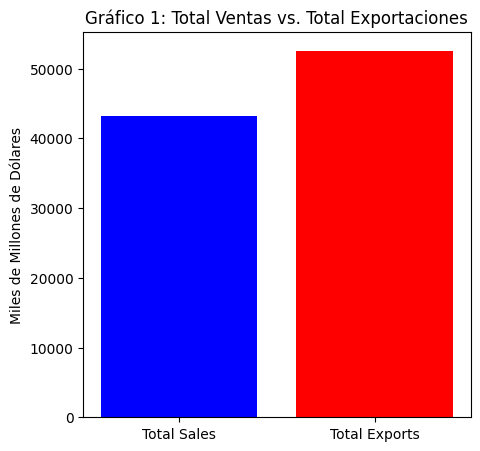

In [ ]:
# VISUALIZACIÓN GRÁFICA DEL TOTAL DE VENTAS VS TOTAL DE EXPORTACIONES.
tot_sales = round((df_sales.sum().drop('distributor').sum())/1000000,0)
tot_exports = round((df_exports.sum().drop('distributor').sum())/1000000,0)

# Etiquetas y valores
labels = ['Total Sales', 'Total Exports']
values = [tot_sales, tot_exports]

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(5, 5))
bars = ax.bar(labels, values, color=['blue', 'red'])

# Añadir título y etiquetas
ax.set_title('Gráfico 1: Total Ventas vs. Total Exportaciones')
ax.set_ylabel('Miles de Millones de Dólares')

# Mostrar el gráfico
plt.show()

Podemos ver en el **Gráfico 1** que el total de capital erogado para exportar los materiales a Paraguay (Total Exports) es mayor al capital generado por la venta de los mismos (Total Sales).
Esto ya nos comienza a dar una idea de por qué hay una **baja tasa de Retorno de Inversión**.

---



**ANALISIS ESTRATIFICADO**

Realizamos una visualización estratificada, discriminando por cada material, mediante los métodos describe sobre los Data Frames `df_sales` y `df_exports`. Con esto buscamos corroborar si hay algún material en específico que haya tenido problemas, o si es algo generalizado.

In [ ]:
# VISUALIZACIÓN DE PLANILLA VENTAS Y EXPORTACIONES
print('RESUMEN DE PLANILLA VENTAS (df_sales)\n')
# Con include evitamos traer los enteros de "distributor" y con drop eliminamos la columna 'count' ya que no es relevante en este caso.
display(df_sales.describe(include=['float64']).drop('count'))
print('\n----------------------------------------------------------------------------------------\n')

print('RESUMEN DE PLANILLA EXPORTACIONES (df_exports)\n')
display(df_exports.describe(include=['float64']).drop('count'))
print('\n----------------------------------------------------------------------------------------\n')

RESUMEN DE PLANILLA VENTAS (df_sales)



,Rubber,Brass,Vinyl,Granite,Stone,Brick,Aluminum,Glass,Plexiglass,Steel,Wood,Plastic
mean,"$38,192,135.03","$41,833,167.75","$43,467,934.56","$41,938,512.51","$37,534,531.72","$3,469.50","$49,178,012.97","$49,392,633.70","$590,319,106.11","$1,328.59","$43,876,478.65","$46,530,413.05"
std,"$22,861,617.98","$30,637,106.50","$30,812,148.98","$30,316,025.99","$22,046,995.00","$9,185.90","$33,115,375.06","$37,333,892.57","$957,632,863.33","$2,458.28","$30,330,485.02","$62,847,437.58"
min,"$1,346,769.34","$1,346,769.34","$1,346,769.34","$1,346,769.34","$1,346,769.34",$0.00,"$6,706,393.21","$1,586,769.34","$1,346,769.34",$0.00,"$1,346,769.34","$20,982.80"
25%,"$21,421,137.39","$21,421,137.39","$21,857,576.34","$21,857,576.34","$21,421,137.39",$0.00,"$27,029,103.27","$21,733,326.59","$40,330,407.72",$0.00,"$21,857,576.34","$9,427,595.12"
50%,"$36,801,565.80","$39,286,327.95","$41,736,189.62","$39,088,026.65","$36,801,565.80",$0.00,"$42,962,159.58","$42,962,159.58","$136,731,561.59",$192.10,"$41,735,189.62","$32,585,187.64"
75%,"$55,233,874.04","$56,156,888.89","$57,054,260.79","$55,233,874.04","$54,637,898.41",$0.00,"$59,365,462.48","$60,206,125.67","$1,133,965,344.13",$959.19,"$57,054,260.79","$54,850,789.65"
max,"$90,185,311.22","$177,874,267.01","$177,874,267.01","$177,874,267.01","$90,185,311.22","$42,458.00","$177,874,267.01","$177,874,267.01","$5,441,399,590.44","$11,121.98","$177,874,267.01","$325,185,311.22"



----------------------------------------------------------------------------------------

RESUMEN DE PLANILLA EXPORTACIONES (df_exports)



,Rubber,Brass,Vinyl,Granite,Stone,Brick,Aluminum,Glass,Plexiglass,Steel,Wood,Plastic
mean,"$33,296,420.05","$31,691,793.75","$31,728,419.39","$30,390,226.45","$33,512,974.75","$119,557,932.02","$34,390,218.86","$32,495,153.75","$472,255,284.89","$310,293,864.23","$32,026,626.75","$33,094,177.14"
std,"$7,292,618.57","$7,868,101.75","$5,806,897.43","$7,851,079.25","$7,317,395.01","$302,307,924.37","$6,551,059.72","$6,849,606.29","$1,910,909,728.31","$1,840,670,976.33","$7,837,083.33","$7,409,087.02"
min,"$20,607,246.00","$20,737,841.00","$20,935,764.00","$20,871,609.00","$21,683,294.00","$20,840,169.00","$21,443,932.00","$21,113,491.00","$21,395,275.00","$21,114,989.00","$20,797,348.00","$20,684,792.00"
25%,"$28,051,209.50","$23,725,491.25","$27,362,197.00","$23,233,564.25","$27,187,189.25","$28,606,811.25","$29,988,102.00","$27,156,975.50","$30,085,566.50","$26,748,319.00","$24,132,952.00","$26,481,899.25"
50%,"$34,446,810.00","$29,940,461.50","$32,015,562.50","$28,799,755.00","$32,615,581.50","$34,423,280.50","$34,086,807.50","$31,690,785.00","$35,126,374.00","$32,093,718.00","$32,480,919.00","$33,213,202.50"
75%,"$38,624,540.50","$38,970,423.25","$36,136,796.25","$37,509,911.00","$39,426,201.00","$42,827,796.50","$40,676,401.50","$37,188,295.25","$38,996,019.25","$38,412,135.75","$39,637,173.75","$38,725,399.75"
max,"$44,229,593.00","$44,568,676.00","$42,055,834.00","$45,198,396.00","$45,128,426.00","$1,643,078,851.00","$44,733,537.00","$44,676,489.00","$9,440,858,902.00","$12,242,337,842.00","$44,049,215.00","$44,234,252.00"



----------------------------------------------------------------------------------------



`LA ANTERIOR VISUALIZACIÓN, OMITE LA COLUMNA DE DISTRIBUTORS Y LA "ESTADISTICA" COUNT, POR NO SER RELEVANTES PARA ESTE CASO.`

---
**CONCLUSIONES EN VENTAS**

Podemos observar que la mayoría de los materiales presentan una **MEDIA** coincidente con la **MEDIANA** (2° cuartil), a excepción de los materiales ***Brick, Plexiglass y Steel***.

Llama especialmente la atención la gran diferencia en los valores de ***Brick y Steel***, los cuales se encuentran muy por debajo del resto de materiales, incluso mucho de ellos son nulos.

Luego corroboramos mediante el conteo, que efectivamente muy pocos distribuidores han tenido ventas o ventas sigfinicativas para estos materiales.

**CONCLUSIONES EN EXPORTACIONES**

Podemos observar que las **MEDIAS** coinciden con las **MEDIANAS** (2°cuantil) en la mayoría de los materiales. Nuevamente con excepción de ***Brick, Plexiglass y Steel***, en los cuales hay una diferencia muy notoria. Esto nos indica que hay presencia de **valores extremos o anómalos 'outliers'**.
Sin embargo, seguimos el análisis solamente con ***Brick y Steel*** ya que son los responsables del bajo ROI.

Al revisar los máximos valores de exportación a Paraguay, efectivamente corroboramos que los materiales en cuestión se presentan muy superiores al resto.

---
En base a lo observado en ambos Data Frames, procedemos a realizar algunos conteos y revisión de máximos para buscar valores anómalos.

In [ ]:
print('DISTRIBUIDORES CON VENTAS EN BRICKS Y STEEL\n')
# Contamos solos los valores de Bricks y Steel mayores que cero.
print(f'Del total de {len(df_sales)} distribuidores:')
print(f'Solo {df_sales.Brick[df_sales.Brick > 0].count()} distribuidores registran ventas en Bricks.')
print(f'Solo {df_sales.Steel[df_sales.Steel > df_sales.Steel.mean()].count()} distribuidores registran ventas mayores a la media en Steel.')
print('----------------------------------------------------------------------------------------')

DISTRIBUIDORES CON VENTAS EN BRICKS Y STEEL

Del total de 44 distribuidores:
Solo 8 distribuidores registran ventas en Bricks.
Solo 10 distribuidores registran ventas mayores a la media en Steel.
----------------------------------------------------------------------------------------


In [ ]:
print('MÁXIMOS VALORES DE VENTAS\n')
print(df_sales.max()[1:].sort_values(ascending=False))
print('----------------------------------------------------------------------------------------\n')

MÁXIMOS VALORES DE VENTAS

Plexiglass   $5,441,399,590.44
Plastic        $325,185,311.22
Brass          $177,874,267.01
Vinyl          $177,874,267.01
Granite        $177,874,267.01
Aluminum       $177,874,267.01
Glass          $177,874,267.01
Wood           $177,874,267.01
Rubber          $90,185,311.22
Stone           $90,185,311.22
Brick               $42,458.00
Steel               $11,121.98
dtype: float64
----------------------------------------------------------------------------------------



In [ ]:
print('MÁXIMOS VALORES DE EXPORTACIONES\n')
print(df_exports.max()[1:].sort_values(ascending=False))
print('----------------------------------------------------------------------------------------\n')

MÁXIMOS VALORES DE EXPORTACIONES

Steel        $12,242,337,842.00
Plexiglass    $9,440,858,902.00
Brick         $1,643,078,851.00
Granite          $45,198,396.00
Stone            $45,128,426.00
Aluminum         $44,733,537.00
Glass            $44,676,489.00
Brass            $44,568,676.00
Plastic          $44,234,252.00
Rubber           $44,229,593.00
Wood             $44,049,215.00
Vinyl            $42,055,834.00
dtype: float64
----------------------------------------------------------------------------------------



---
**ANÁLISIS DE TOTALES**

TOTALES x MATERIAL:


,Rubber,Brass,Vinyl,Granite,Stone,Brick,Aluminum,Glass,Plexiglass,Steel,Wood,Plastic
Ventas,"$1,680,453,941.29","$1,840,659,380.95","$1,912,589,120.56","$1,845,294,550.27","$1,651,519,395.63","$152,658.00","$2,163,832,570.85","$2,173,275,882.75","$25,974,040,668.70","$58,457.97","$1,930,565,060.44","$2,047,338,174.32"
Exportaciones,"$1,465,042,482.00","$1,394,438,925.00","$1,396,050,453.00","$1,337,169,964.00","$1,474,570,889.00","$5,260,549,009.00","$1,513,169,630.00","$1,429,786,765.00","$20,779,232,535.00","$13,652,930,026.00","$1,409,171,577.00","$1,456,143,794.00"
Balance,"$215,411,459.29","$446,220,455.95","$516,538,667.56","$508,124,586.27","$176,948,506.63","$-5,260,396,351.00","$650,662,940.85","$743,489,117.75","$5,194,808,133.70","$-13,652,871,568.03","$521,393,483.44","$591,194,380.32"


----------------------------------------------------------------------------------------

TOTALES x MATERIAL (REPRESENTACIÓN GRÁFICA)


<Axes: title={'center': 'Gráfico 2: Balance Ventas - Importaciones'}, ylabel='Millones de $'>

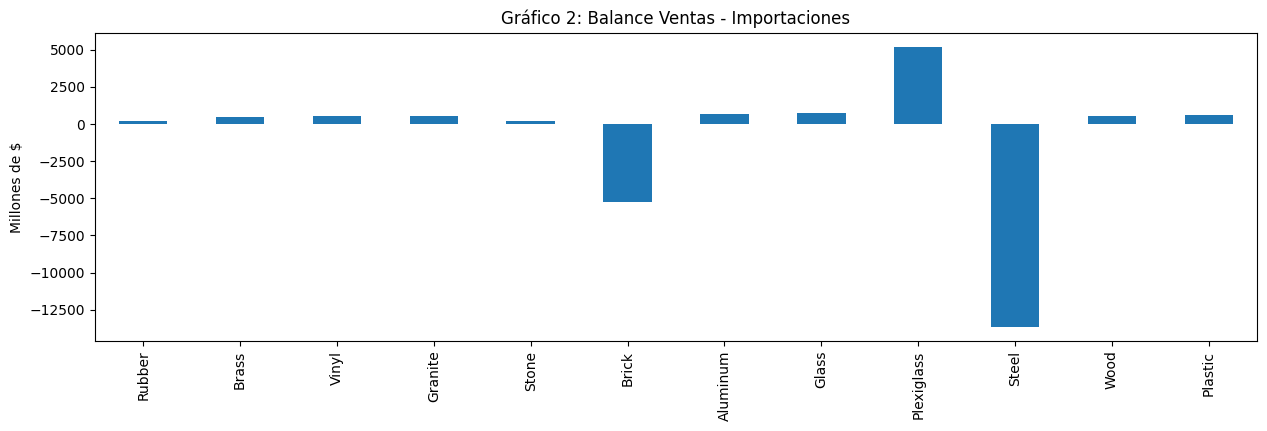

In [ ]:
# Creamos un DF que contenga los totales de las ventas de cada material.
df_sales_total = df_sales.sum().drop('distributor')

# Creamos un DF que contenga los totales de las exportaciones de cada material.
df_exports_total = df_exports.sum().drop('distributor')

# Creamos DF con la diferencia entre sales y exports.
df_sales_VS_export = df_sales_total - df_exports_total

# Mostramos un DF con los 3 DF generados anteriormente, para visualizar los valores resultantes en cada material.
print('TOTALES x MATERIAL:')
df_balance = pd.DataFrame([df_sales_total,df_exports_total,df_sales_VS_export],index=['Ventas','Exportaciones','Balance'])
display(df_balance)

print('----------------------------------------------------------------------------------------\n')

# Mostramos resultados anteriores en una visualización gráfica para que sea más apreciable la marcada diferencia con Brick y Steel.
print('TOTALES x MATERIAL (REPRESENTACIÓN GRÁFICA)')
(df_sales_VS_export/1000000).plot(kind='bar',title="Gráfico 2: Balance Ventas - Importaciones", figsize=(15,4),ylabel='Millones de $')

En el **Gráfico 2** vemos que la pérdida que representan **Brick y Steel** son muy significativas, tanto que solo esos dos materiales suman mayor capital que las ganancias producidas por el resto de los materiales.

---
**REVISIÓN DE VALORES GLOBALES**

In [ ]:
# HACEMOS LO MISMO PERO SIN DIFERENCIAR POR MATERIALES, SIMPLEMENTE LOS TOTALES PARA VER LA GRAN DIFERENCIA DE VENTAS E IMPORTACIEONS.
df_resta= df_sales_total.sum() - df_exports_total.sum()
df_balance_global = pd.DataFrame([df_sales_total.sum(),df_exports_total.sum(),df_resta.sum()],index=['Ventas','Exportaciones','Balance'],columns=['Resumen_Paraguay'])
df_balance_global

,Resumen_Paraguay
Ventas,"$43,219,779,861.73"
Exportaciones,"$52,568,256,049.00"
Balance,"$-9,348,476,187.27"


---
Revisamos las actividades de las localidades donde CMM tiene distribución.

In [ ]:
df_locations

,id_city,id_city_CMM,location,department,activities
0,8,42,Yaguarón,Paraguarí,"agriculture, livestock, hunting and related, t..."
1,4,102,Tobatí,Cordillera,"bricks, tiles and ceramics manufacture, craft ..."
2,3,112,San Cosme y Damián,Itapúa,"agriculture, livestock, hunting and related, t..."
3,10,169,San Miguel,Misiones,craft production
4,1,286,Itapé,Guairá,"agriculture, livestock, hunting and related, t..."
5,2,387,Villa Hayes,Presidente Hayes,"commerce, steel,agriculture, livestock, huntin..."
6,9,402,San Pedro del Paraná,Itapúa,"agriculture, livestock, hunting and related"
7,7,409,Altos,Cordillera,"agriculture, livestock, hunting and related, l..."
8,5,519,Guayaybi,San Pedro,"agriculture, livestock, hunting and related"
9,11,523,Coronel Martínez,Guairá,"agriculture, livestock, hunting and related"


Podemos observar que en las ciudades donde CMM tiene presencia, solo hay dos en donde hay actividades relacionadas con Bricks y Steel. La gran mayoría se dedica a la agricultura. Podemos concluir que es lógico que **no haya demanda** de los mismos.

---
**CONSIDERACIONES FINALES**

Analizando la sumatoria total de ventas versus la sumatoria total de exportaciones, se puede ver claramente el problema con los materiales Brick y Steel. En ambos casos, las ventas están significativamente por debajo del valor de importación. Tanto es así, que la suma de ambas pérdidas termina perjudicando al resto de los materiales en conjunto. Este desequilibrio no solo afecta la rentabilidad de estos productos específicos, sino que también impacta negativamente en el balance general de la empresa.



Este hallazgo coincide con el análisis visual inicial, confirmando que el problema está concentrado en estos dos materiales en particular. La corroboración a través de datos cuantitativos refuerza la necesidad de tomar medidas correctivas específicas para los materiales Brick y Steel.



No queremos dejar de mencionar que la causa subyacente de este problema podría estar relacionada con las actividades económicas predominantes en la región. En la Planilla Locations (2.3), podemos observar que entre las principales actividades económicas se encuentra la agricultura en lugar de la construcción. Esta discrepancia sugiere que la demanda de materiales de construcción es naturalmente baja en esta área, lo que contribuye a la baja tasa de retorno de inversión para Brick y Steel.



Esto explica el fallo en la estrategia por parte de los directivos de CMM. Sería beneficioso llevar a cabo un análisis de mercado más detallado antes de realizar futuras inversiones en ciertos materiales en esta región para asegurarse de que se alinean con las tendencias económicas locales.



En conclusión, este análisis identifica los problemas actuales que presenta la empresa en esta región , explicando su bajo retorno de inversión.
También ofrece una base para desarrollar estrategias que puedan mejorar la eficiencia y la rentabilidad en el futuro. La alineación de las operaciones de CMM con las condiciones económicas locales será necesario para el éxito sostenible de la empresa en esta región.

